In [282]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# import evluation matrix for regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import train_test_split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# import Lasso Model from sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import datetime


In [283]:
# load training dataset
data = pd.read_csv('data.csv')

In [284]:
# Get information from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [285]:
# Manually drop useless columns
drop_columns = [' Operating Profit Rate',' Pre-tax net Interest Rate',' After-tax net Interest Rate',' Non-industry income and expenditure/revenue',
' Continuous interest rate (after tax)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate',' After-tax Net Profit Growth Rate',
' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio',' Long-term Liability to Current Assets',
' Inventory and accounts receivable/Net value', ' Operating Funds to Liability',' Inventory/Working Capital', ' Working capitcal Turnover Rate',
' Current Liability to Equity', ' Equity to Long-term Liability', ' Cash Flow to Equity', ' No-credit Interval',
" Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)',' Liability-Assets Flag',' Net Income Flag']
data = data.drop(columns=drop_columns)

In [286]:
# Check if there is any missing value in the dataset
null_values = data.isnull().sum()
null_values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Total assets to GNP price                                  0
 Gross Profit to Sales                                      0
 Liability to Equity                                        0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Length: 72, dtype: int64

1. Finding the coefficients of attributes using the lasso regression

In [287]:
# split training and testing dataset
features = list(data.columns[1:94])
X = data[features]
y = data['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

features

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Cash Reinvestment %',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Long-term fund suitability ratio (A)',
 ' Borrowing dependency',
 ' Contingent liabilities/Net worth',
 ' Operating profit/Paid-in ca

In [288]:
# Define model to be Lasso, set alpha=1 (alpha is the regularization parameter)
# Define model to be Ridge, set alpha=1 (alpha is the regularization parameter)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
alpha_l1 = 0.5
alpha_l2 = 0.5
lasso = Lasso(alpha = alpha_l1)
ridge = Ridge(alpha = alpha_l2)

In [289]:
score_lasso = cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)
score_ridge = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.18271e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.89543e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.64872e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.7224e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

In [290]:
lasso = lasso.fit(X_train,y_train)
ridge = ridge.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.02199e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [291]:
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

In [292]:
R2 = r2_score(y_test, lasso_pred)
MAE = mean_absolute_error(y_test, lasso_pred)
MSE = mean_squared_error(y_test, lasso_pred)
print ("Lasso result")
print (R2)
print (MAE)
print (MSE)

Lasso result
-0.0017480237773035423
0.06079143199298237
0.028054149973742875


In [293]:
R2 = r2_score(y_test, ridge_pred)
MAE = mean_absolute_error(y_test, ridge_pred)
MSE = mean_squared_error(y_test, ridge_pred)
print ("ridge result")
print (R2)
print (MAE)
print (MSE)

ridge result
0.12534214680189903
0.068064857554426
0.024494964808422167


In [294]:
# train model using whole dataset
lasso.fit(X, y)
ridge.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.24302e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1)

In [295]:
# show the intercept of the trained model (Theta_0)
print(lasso.intercept_)

# show the coefficients of independent attributes
coeff_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff_df

0.04229543392725877


,Coefficient
ROA(C) before interest and depreciation before interest,-0.000000e+00
ROA(A) before interest and % after tax,-0.000000e+00
ROA(B) before interest and depreciation after tax,-0.000000e+00
Operating Gross Margin,-0.000000e+00
Realized Sales Gross Margin,-0.000000e+00
...,...
Total assets to GNP price,1.649499e-11
Gross Profit to Sales,-0.000000e+00
Liability to Equity,0.000000e+00
Interest Coverage Ratio (Interest expense to EBIT),-0.000000e+00


In [296]:
# show the intercept of the trained model (Theta_0)
print(ridge.intercept_)

# show the coefficients of independent attributes
coeff_df = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
coeff_df

0.7133402972728881


,Coefficient
ROA(C) before interest and depreciation before interest,1.922186e-01
ROA(A) before interest and % after tax,1.054133e-01
ROA(B) before interest and depreciation after tax,-3.360041e-01
Operating Gross Margin,-1.624129e-02
Realized Sales Gross Margin,-1.457006e-02
...,...
Total assets to GNP price,5.816023e-12
Gross Profit to Sales,-1.623586e-02
Liability to Equity,1.880039e-01
Interest Coverage Ratio (Interest expense to EBIT),-2.492461e-02


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (71).

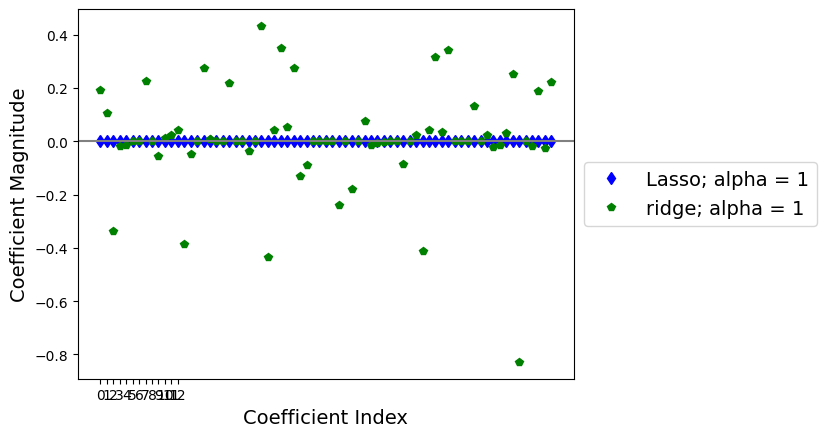

In [297]:
plt.plot(lasso.coef_,linestyle='none',marker='d',markersize=6,color='blue',label=f'Lasso; alpha = {alpha_l1}')

plt.plot(ridge.coef_,linestyle='none',marker='p',markersize=6,color='green',label=f'ridge; alpha = {alpha_l2}')

# draw a horizontal line at 0.
plt.axhline(y=0, color='grey', linestyle='-')

plt.xlabel('Coefficient Index',fontsize=14)
plt.ylabel('Coefficient Magnitude',fontsize=14)
#plt.legend(fontsize=13,loc=10)
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(np.arange(13), (features), fontsize=10)
plt.show()